## Food Delivery Time Prediction

*Author - Olalekan Fagbuyi*

### Introduction

Over the last couple of years, food delivery has become a norm in people’s lives and this behaviour became even more prominent with the 2020 pandemic. More and more people began to order takeout food online or via phone calls rather than taking trips to the restaurant for pick up. This phenomenon has led to the rise of third-party delivery apps like UberEats, GrubHub, Deliveroo, and JustEat, to mention a few valued in the billions of dollars. Restaurants have also focused on improving their delivery capacity in recent times because it serves as an extra boost to sales by as much as 30% in a very competitive market.

The key metric in determining successful food delivery is **TIME** as delivery minutes directly impact customer satisfaction, food quality and food safety. This project focuses on predicting delivery time and identifying the key features that determine it based on the dataset analyzed.

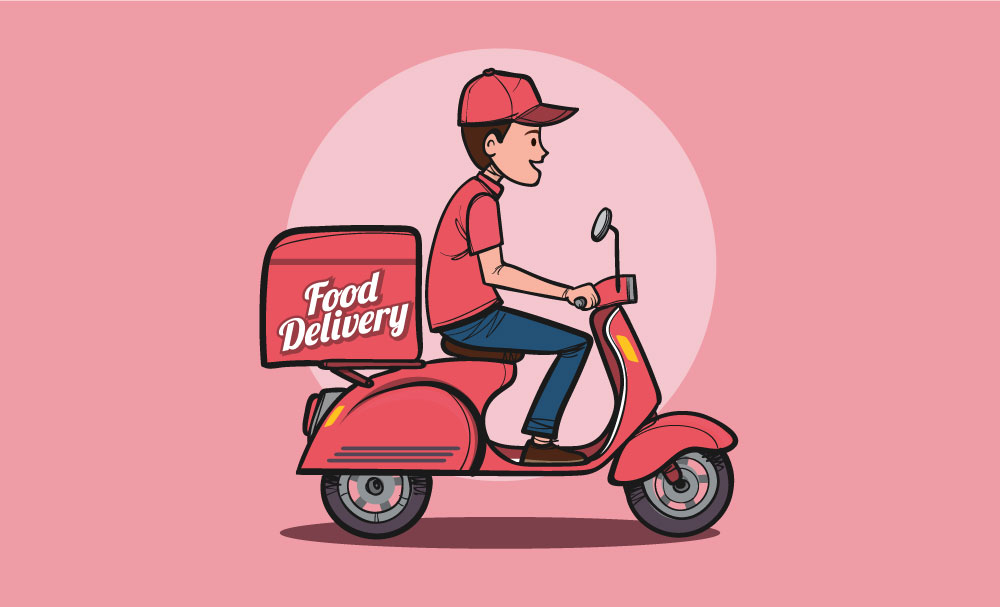

### Table of Contents

1. Importing Libraries
2. Loading Dataset and EDA
3. Data Pre-processing and Feature Engineering
4. Visualization
5. Feature Selection
6. Feature Importance
7. ML Modelling -  Interpretation and Evaluation

### 1. Import Libraries

Libraries used for this project are divided into sections based on their application

In [40]:
#Data Analysis
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Feature selection and engineering
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA

#Machine Learning
#import libraries for machine learning models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xg
from sklearn.metrics import r2_score, mean_squared_error

#Notebook Settings
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

### 2. Loading Dataset and EDA

After loading the dataset using the pd.read_csv command, methods such as info(), describe(), isnull(), and duplicated() were passed to get a better understanding of the dataset

In [2]:
delivery = pd.read_csv("C:\\Users\\ofagb\\OneDrive\\Documents\\Python\\Delivery Time Preduction.csv")
delivery

,Order_id,Driver_ID,Driver_Age,Driver_Rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Traffic,Vehicle_condition,Order_Type,Vehicle_Type,No_of_Orders,Holiday,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,1,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,2,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30:00,8:45:00,Sandstorms,Low,0,Drinks,motorcycle,2,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,2,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,2,No,Metropolitian,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22959,0x975,JAPRES15DEL03,30,4.6,26.891191,75.802083,26.981191,75.892083,18-03-2022,20:35:00,20:40:00,Windy,Jam,0,Snack,motorcycle,3,Yes,Urban,52
22960,0xd3f7,AURGRES20DEL01,28,4.8,0.000000,0.000000,0.040000,0.040000,13-02-2022,14:00:00,14:05:00,Windy,High,2,Meal,electric_scooter,1,No,Metropolitian,16
22961,0x5589,CHENRES08DEL02,36,4.6,13.022394,80.242439,13.072394,80.292439,1/3/2022,19:45:00,20:00:00,Cloudy,Jam,0,Meal,motorcycle,1,No,Metropolitian,34
22962,0x530b,INDORES11DEL01,23,5.0,22.751234,75.889490,22.821234,75.959490,29-03-2022,23:40:00,23:55:00,Sandstorms,Low,0,Buffet,motorcycle,2,No,Metropolitian,19


In [3]:
#checking for null values and datatypes of columns
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22964 entries, 0 to 22963
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Order_id                     22964 non-null  object 
 1   Driver_ID                    22964 non-null  object 
 2   Driver_Age                   22964 non-null  int64  
 3   Driver_Rating                22964 non-null  float64
 4   Restaurant_latitude          22964 non-null  float64
 5   Restaurant_longitude         22964 non-null  float64
 6   Delivery_location_latitude   22964 non-null  float64
 7   Delivery_location_longitude  22964 non-null  float64
 8   Order_Date                   22964 non-null  object 
 9   Time_Orderd                  22964 non-null  object 
 10  Time_Order_picked            22964 non-null  object 
 11  Weather                      22964 non-null  object 
 12  Traffic                      22964 non-null  object 
 13  Vehicle_conditio

In [4]:
delivery.describe()

,Driver_Age,Driver_Rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,No_of_Orders,Time_taken(min)
count,22964.000000,22964.000000,22964.000000,22964.000000,22964.000000,22964.000000,22964.000000,22964.000000,22964.000000
mean,29.639653,4.632412,17.223140,70.850915,17.440233,70.914648,1.000174,1.750392,26.590402
std,5.753539,0.315634,7.675764,21.039615,7.323242,21.039816,0.817918,0.570709,9.361777
min,20.000000,2.500000,-30.902872,0.000000,0.010000,0.010000,0.000000,1.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170937,12.983298,73.295081,0.000000,1.000000,19.000000
50%,30.000000,4.700000,18.551440,75.902847,18.632450,76.016959,1.000000,2.000000,26.000000
75%,35.000000,4.900000,22.728163,78.045359,22.783659,78.104799,2.000000,2.000000,33.000000
max,39.000000,5.000000,30.914057,88.433452,31.045562,88.563452,2.000000,4.000000,54.000000


In [5]:
#checking for null values
delivery.isnull().sum().sort_values(ascending = False)

Order_id                       0
Driver_ID                      0
City                           0
Holiday                        0
No_of_Orders                   0
Vehicle_Type                   0
Order_Type                     0
Vehicle_condition              0
Traffic                        0
Weather                        0
Time_Order_picked              0
Time_Orderd                    0
Order_Date                     0
Delivery_location_longitude    0
Delivery_location_latitude     0
Restaurant_longitude           0
Restaurant_latitude            0
Driver_Rating                  0
Driver_Age                     0
Time_taken(min)                0
dtype: int64

In [6]:
#checking for duplicated rows
duplicateRows = delivery[delivery.duplicated()]
duplicateRows

,Order_id,Driver_ID,Driver_Age,Driver_Rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Traffic,Vehicle_condition,Order_Type,Vehicle_Type,No_of_Orders,Holiday,City,Time_taken(min)


### 3. Data Preprocessing and Feature Engineering


This involves creating new features that better predict the target variable from already existing independent variables 

* Prep Time (mins) - Difference between order time and time rider picks up order at the restuarant
* Order Day - Extract day of the week from Order_Date column
* Distance  - Calculating distance between restaurant and delivery location using their longitude and latitude data

In [7]:
#converting datatypes to the appropriate format
delivery['Time_Orderd'] = pd.to_datetime(delivery['Time_Orderd'])
delivery['Time_Order_picked'] = pd.to_datetime(delivery['Time_Order_picked'])
delivery['Order_Date'] = pd.to_datetime(delivery['Order_Date'])

#### i. Prep Time (mins)

In [8]:
#calculating prep time
delivery['Preparation_Time'] = delivery['Time_Order_picked'] - delivery['Time_Orderd']
delivery.head()

,Order_id,Driver_ID,Driver_Age,Driver_Rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Traffic,Vehicle_condition,Order_Type,Vehicle_Type,No_of_Orders,Holiday,City,Time_taken(min),Preparation_Time
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2023-02-07 11:30:00,2023-02-07 11:45:00,Sunny,High,2,Snack,motorcycle,1,No,Urban,24,0 days 00:15:00
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2023-02-07 19:45:00,2023-02-07 19:50:00,Stormy,Jam,2,Snack,scooter,2,No,Metropolitian,33,0 days 00:05:00
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2023-02-07 08:30:00,2023-02-07 08:45:00,Sandstorms,Low,0,Drinks,motorcycle,2,No,Urban,26,0 days 00:15:00
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2023-02-07 18:00:00,2023-02-07 18:10:00,Sunny,Medium,0,Buffet,motorcycle,2,No,Metropolitian,21,0 days 00:10:00
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2023-02-07 13:30:00,2023-02-07 13:45:00,Cloudy,High,1,Snack,scooter,2,No,Metropolitian,30,0 days 00:15:00


In [9]:
#extracting all components of the timedelta variable
Prep_Mins= pd.to_timedelta(delivery['Preparation_Time']).dt.components
Prep_Mins

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,0,0,15,0,0,0,0
1,0,0,5,0,0,0,0
2,0,0,15,0,0,0,0
3,0,0,10,0,0,0,0
4,0,0,15,0,0,0,0
...,...,...,...,...,...,...,...
22959,0,0,5,0,0,0,0
22960,0,0,5,0,0,0,0
22961,0,0,15,0,0,0,0
22962,0,0,15,0,0,0,0


In [10]:
#adding minutes components of Prep_Mins df to main delivery df as Prep_Tiime(mins)
delivery['Prep_Time(mins)']= Prep_Mins['minutes']
delivery

,Order_id,Driver_ID,Driver_Age,Driver_Rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Traffic,Vehicle_condition,Order_Type,Vehicle_Type,No_of_Orders,Holiday,City,Time_taken(min),Preparation_Time,Prep_Time(mins)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2023-02-07 11:30:00,2023-02-07 11:45:00,Sunny,High,2,Snack,motorcycle,1,No,Urban,24,0 days 00:15:00,15
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2023-02-07 19:45:00,2023-02-07 19:50:00,Stormy,Jam,2,Snack,scooter,2,No,Metropolitian,33,0 days 00:05:00,5
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2023-02-07 08:30:00,2023-02-07 08:45:00,Sandstorms,Low,0,Drinks,motorcycle,2,No,Urban,26,0 days 00:15:00,15
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2023-02-07 18:00:00,2023-02-07 18:10:00,Sunny,Medium,0,Buffet,motorcycle,2,No,Metropolitian,21,0 days 00:10:00,10
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2023-02-07 13:30:00,2023-02-07 13:45:00,Cloudy,High,1,Snack,scooter,2,No,Metropolitian,30,0 days 00:15:00,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22959,0x975,JAPRES15DEL03,30,4.6,26.891191,75.802083,26.981191,75.892083,2022-03-18,2023-02-07 20:35:00,2023-02-07 20:40:00,Windy,Jam,0,Snack,motorcycle,3,Yes,Urban,52,0 days 00:05:00,5
22960,0xd3f7,AURGRES20DEL01,28,4.8,0.000000,0.000000,0.040000,0.040000,2022-02-13,2023-02-07 14:00:00,2023-02-07 14:05:00,Windy,High,2,Meal,electric_scooter,1,No,Metropolitian,16,0 days 00:05:00,5
22961,0x5589,CHENRES08DEL02,36,4.6,13.022394,80.242439,13.072394,80.292439,2022-01-03,2023-02-07 19:45:00,2023-02-07 20:00:00,Cloudy,Jam,0,Meal,motorcycle,1,No,Metropolitian,34,0 days 00:15:00,15
22962,0x530b,INDORES11DEL01,23,5.0,22.751234,75.889490,22.821234,75.959490,2022-03-29,2023-02-07 23:40:00,2023-02-07 23:55:00,Sandstorms,Low,0,Buffet,motorcycle,2,No,Metropolitian,19,0 days 00:15:00,15


#### ii. Order Day Name and Month Name

In [11]:
#extracting minutes compoment from the datetime column
delivery['Order_Day'] = delivery['Order_Date'].dt.day_name()
delivery['Order_Month'] = delivery['Order_Date'].dt.month_name()

#view dataframe
delivery.head()

,Order_id,Driver_ID,Driver_Age,Driver_Rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Traffic,Vehicle_condition,Order_Type,Vehicle_Type,No_of_Orders,Holiday,City,Time_taken(min),Preparation_Time,Prep_Time(mins),Order_Day,Order_Month
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2023-02-07 11:30:00,2023-02-07 11:45:00,Sunny,High,2,Snack,motorcycle,1,No,Urban,24,0 days 00:15:00,15,Saturday,March
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2023-02-07 19:45:00,2023-02-07 19:50:00,Stormy,Jam,2,Snack,scooter,2,No,Metropolitian,33,0 days 00:05:00,5,Friday,March
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2023-02-07 08:30:00,2023-02-07 08:45:00,Sandstorms,Low,0,Drinks,motorcycle,2,No,Urban,26,0 days 00:15:00,15,Saturday,March
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2023-02-07 18:00:00,2023-02-07 18:10:00,Sunny,Medium,0,Buffet,motorcycle,2,No,Metropolitian,21,0 days 00:10:00,10,Wednesday,May
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2023-02-07 13:30:00,2023-02-07 13:45:00,Cloudy,High,1,Snack,scooter,2,No,Metropolitian,30,0 days 00:15:00,15,Saturday,March


#### iii. Distance

The delivery dataset is missing an importance feature which is the distance between restaurants and delivery location. This will be calculated with the [**Haversine Formula**](https://en.wikipedia.org/wiki/Haversine_formula), by making use of the latitude and longitude points of the restaurant and the delivery location

In [12]:
# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c
  
# Calculate the distance between each pair of points
delivery['Distance(Km)'] = np.nan

for i in range(len(delivery)):
    delivery.loc[i, 'Distance(Km)'] = distcalculate(delivery.loc[i, 'Restaurant_latitude'], 
                                        delivery.loc[i, 'Restaurant_longitude'], 
                                        delivery.loc[i, 'Delivery_location_latitude'], 
                                        delivery.loc[i, 'Delivery_location_longitude'])

In [13]:
#checking dataframe with new distance in km column
delivery.head()

,Order_id,Driver_ID,Driver_Age,Driver_Rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Traffic,Vehicle_condition,Order_Type,Vehicle_Type,No_of_Orders,Holiday,City,Time_taken(min),Preparation_Time,Prep_Time(mins),Order_Day,Order_Month,Distance(Km)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2023-02-07 11:30:00,2023-02-07 11:45:00,Sunny,High,2,Snack,motorcycle,1,No,Urban,24,0 days 00:15:00,15,Saturday,March,3.025149
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2023-02-07 19:45:00,2023-02-07 19:50:00,Stormy,Jam,2,Snack,scooter,2,No,Metropolitian,33,0 days 00:05:00,5,Friday,March,20.183530
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2023-02-07 08:30:00,2023-02-07 08:45:00,Sandstorms,Low,0,Drinks,motorcycle,2,No,Urban,26,0 days 00:15:00,15,Saturday,March,1.552758
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2023-02-07 18:00:00,2023-02-07 18:10:00,Sunny,Medium,0,Buffet,motorcycle,2,No,Metropolitian,21,0 days 00:10:00,10,Wednesday,May,7.790401
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2023-02-07 13:30:00,2023-02-07 13:45:00,Cloudy,High,1,Snack,scooter,2,No,Metropolitian,30,0 days 00:15:00,15,Saturday,March,6.210138


### 4. Data Visualization

Univariate and Bivariate analyses were conducted using key features in the dataset to get a better understanding of their relationship

#### i. Vizualizing numerical variables using Pair Plot

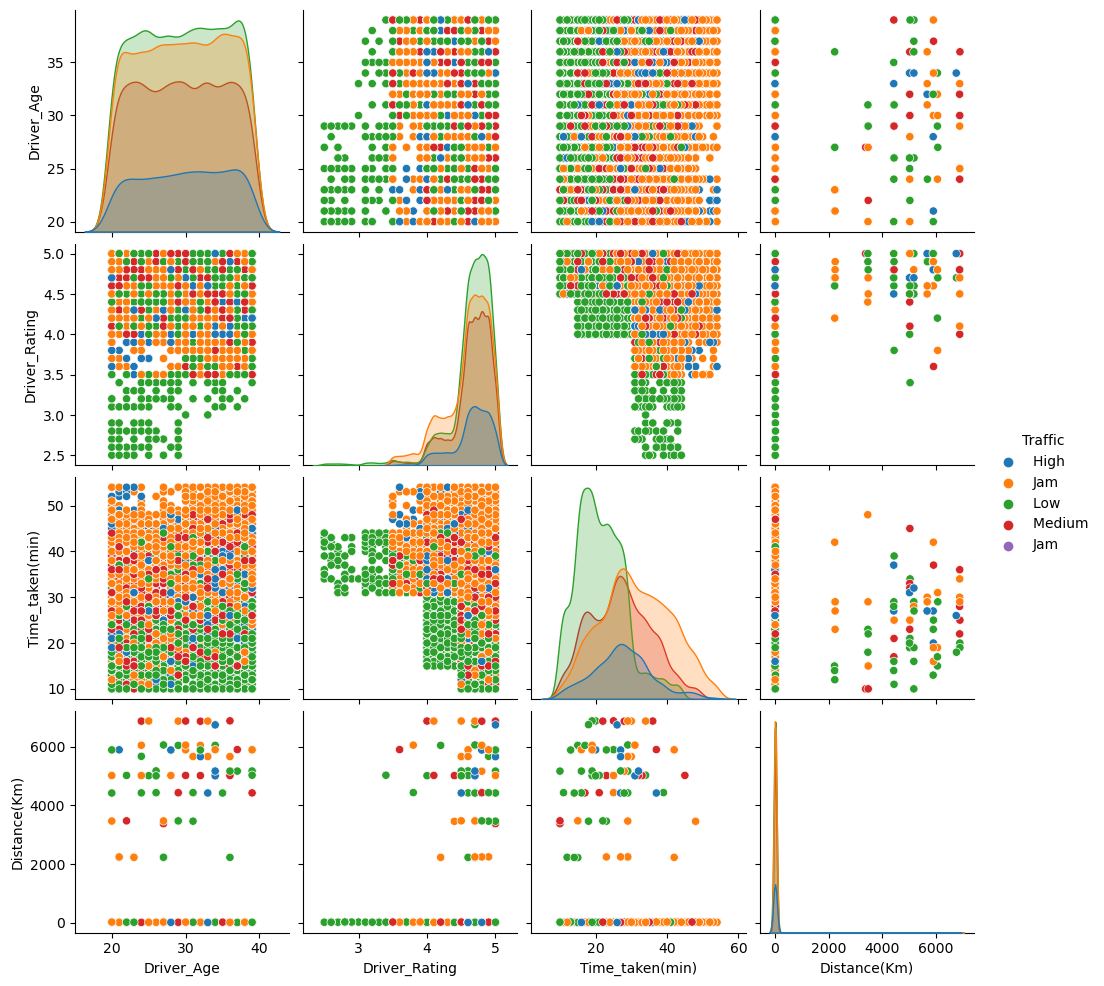

In [14]:
sns.pairplot(data=delivery, diag_kind='kde', hue = 'Traffic', vars =['Driver_Age', 'Driver_Rating', 'Time_taken(min)','Distance(Km)'])

**Comment**

#### ii. Vizualizing Categorical variables using Catplot

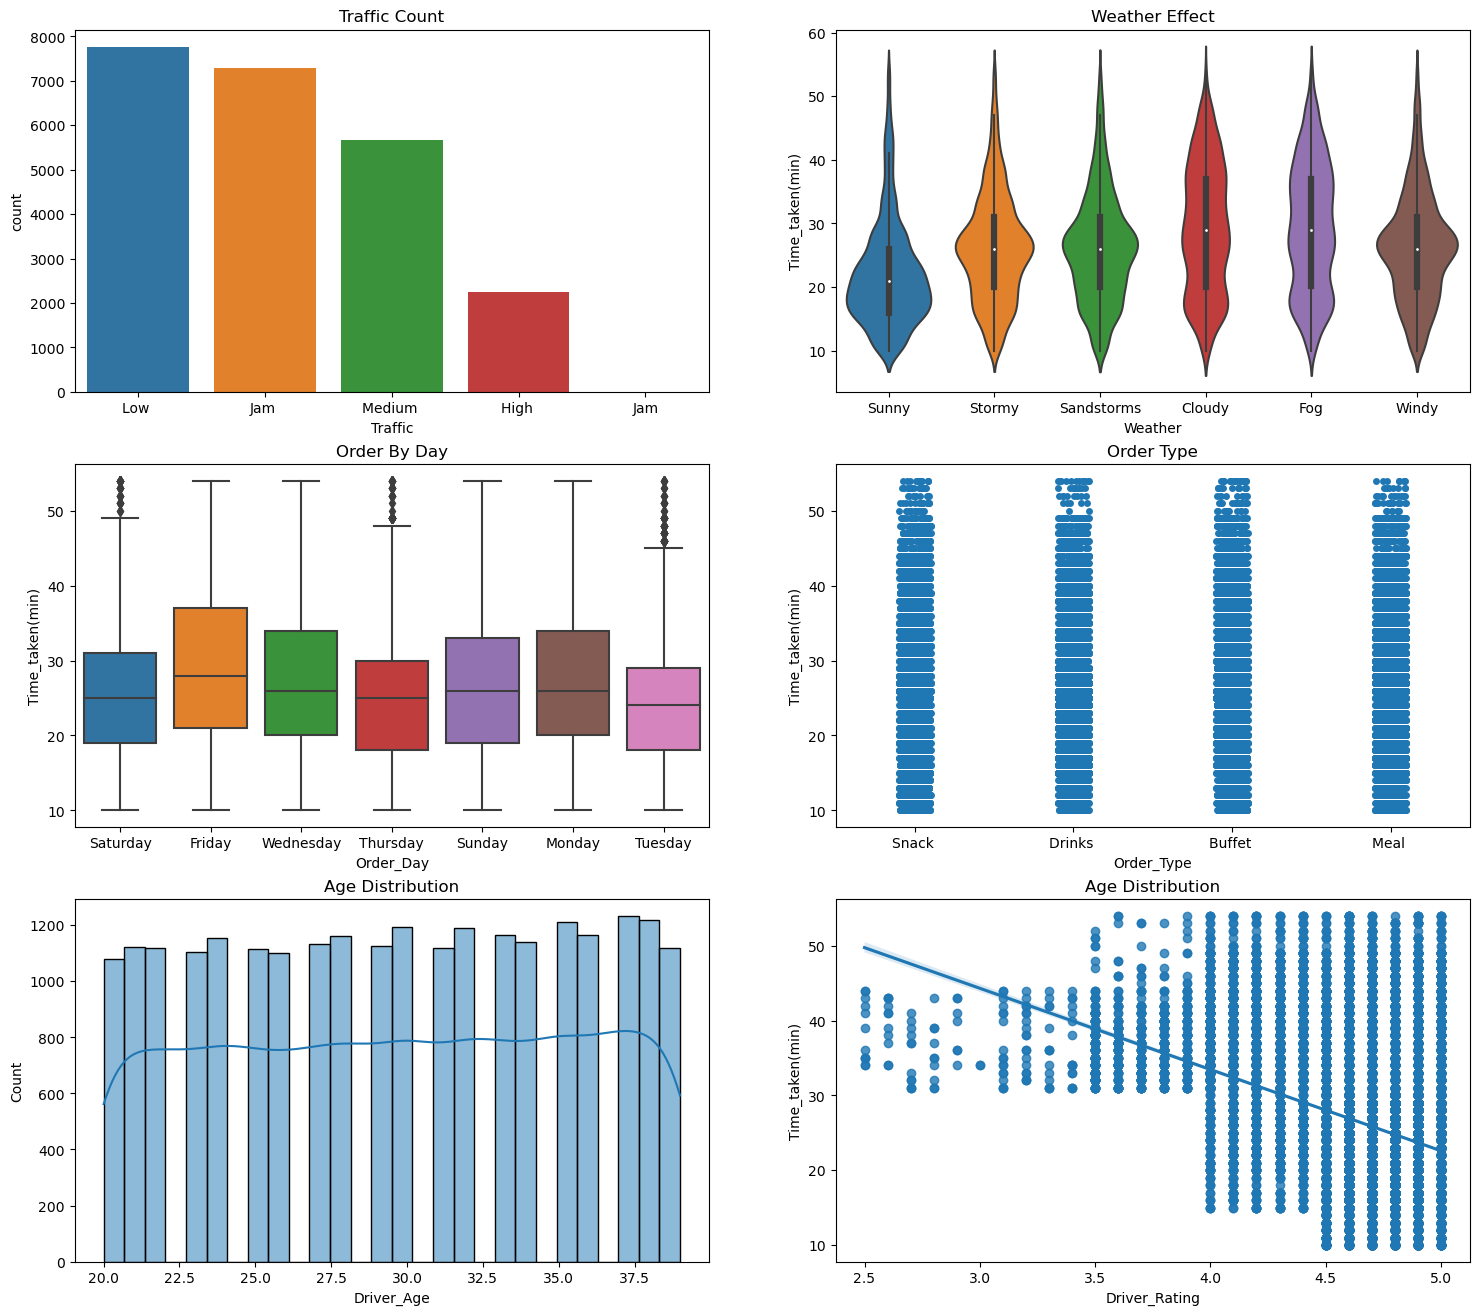

In [15]:
#visualization key distribution of key features
fig, axes = plt.subplots(3, 2, figsize = (18,16))

#different plots were combined for this visualization (count plots and subplots)
sns.countplot(x='Traffic', data= delivery, order= delivery['Traffic'].value_counts().index, ax =axes[0,0]).set(title='Traffic Count')
sns.violinplot(x='Weather', y = 'Time_taken(min)', data= delivery, ax=axes[0,1]).set(title='Weather Effect')
sns.boxplot (x = 'Order_Day', y = 'Time_taken(min)', data = delivery, ax = axes[1,0]).set(title = 'Order By Day')
sns.stripplot(x = 'Order_Type', y = "Time_taken(min)", data = delivery, ax = axes[1,1]).set(title = 'Order Type')
sns.histplot(x = 'Driver_Age', data = delivery, kde = True, ax = axes[2,0]).set(title = 'Age Distribution')
sns.regplot(x = 'Driver_Rating', y = 'Time_taken(min)', data= delivery, ax = axes[2,1]).set(title = 'Age Distribution')

plt.savefig('Subplots', dpi =100)

**Comments**

### 5. Feature Selection

Features will be selected based on their relevance in predicting the target variables Time_taken(min). In order to do this, some features will be dropped. After this, the dataframe will be split into numerical and categorical data types so different selection techniques can be applied.

#### i. Removing unnecessary columns

In [16]:
#checking column names
delivery.columns

Index(['Order_id', 'Driver_ID', 'Driver_Age', 'Driver_Rating',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather', 'Traffic',
       'Vehicle_condition', 'Order_Type', 'Vehicle_Type', 'No_of_Orders',
       'Holiday', 'City', 'Time_taken(min)', 'Preparation_Time',
       'Prep_Time(mins)', 'Order_Day', 'Order_Month', 'Distance(Km)'],
      dtype='object')

In [17]:
#drop columns that will not be used for prediction
delivery.drop(columns = ['Order_id', 'Driver_ID','Restaurant_latitude', 'Restaurant_longitude','Time_Orderd',
                         'Delivery_location_latitude', 'Delivery_location_longitude','Order_Date', 'Time_Order_picked',
                        'Preparation_Time'], axis = 1, inplace = True)
delivery

,Driver_Age,Driver_Rating,Weather,Traffic,Vehicle_condition,Order_Type,Vehicle_Type,No_of_Orders,Holiday,City,Time_taken(min),Prep_Time(mins),Order_Day,Order_Month,Distance(Km)
0,37,4.9,Sunny,High,2,Snack,motorcycle,1,No,Urban,24,15,Saturday,March,3.025149
1,34,4.5,Stormy,Jam,2,Snack,scooter,2,No,Metropolitian,33,5,Friday,March,20.183530
2,23,4.4,Sandstorms,Low,0,Drinks,motorcycle,2,No,Urban,26,15,Saturday,March,1.552758
3,38,4.7,Sunny,Medium,0,Buffet,motorcycle,2,No,Metropolitian,21,10,Wednesday,May,7.790401
4,32,4.6,Cloudy,High,1,Snack,scooter,2,No,Metropolitian,30,15,Saturday,March,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22959,30,4.6,Windy,Jam,0,Snack,motorcycle,3,Yes,Urban,52,5,Friday,March,13.407093
22960,28,4.8,Windy,High,2,Meal,electric_scooter,1,No,Metropolitian,16,5,Sunday,February,6.290135
22961,36,4.6,Cloudy,Jam,0,Meal,motorcycle,1,No,Metropolitian,34,15,Monday,January,7.761839
22962,23,5.0,Sandstorms,Low,0,Buffet,motorcycle,2,No,Metropolitian,19,15,Tuesday,March,10.586911


#### ii. Feature Selection - Numerical Data (using Correlation Matrix)

In [18]:
#numerical variables
num_data = delivery.select_dtypes(include=[np.number])
num_data.head()

,Driver_Age,Driver_Rating,Vehicle_condition,No_of_Orders,Time_taken(min),Prep_Time(mins),Distance(Km)
0,37,4.9,2,1,24,15,3.025149
1,34,4.5,2,2,33,5,20.183530
2,23,4.4,0,2,26,15,1.552758
3,38,4.7,0,2,21,10,7.790401
4,32,4.6,1,2,30,15,6.210138


In [19]:
#Feature selection on numerical variables is performed using correlation matrix
# Target variable is Time_taken(min) is excluded
cor_num = num_data.loc[:, num_data.columns!='Time_taken(min)']
cor = cor_num.corr()
cor

,Driver_Age,Driver_Rating,Vehicle_condition,No_of_Orders,Prep_Time(mins),Distance(Km)
Driver_Age,1.000000,-0.115301,0.004714,0.118586,-0.011053,0.004410
Driver_Rating,-0.115301,1.000000,0.058107,-0.122839,-0.001979,-0.001354
Vehicle_condition,0.004714,0.058107,1.000000,-0.104954,0.006130,-0.000659
No_of_Orders,0.118586,-0.122839,-0.104954,1.000000,0.000631,0.002406
Prep_Time(mins),-0.011053,-0.001979,0.006130,0.000631,1.000000,-0.002551
Distance(Km),0.004410,-0.001354,-0.000659,0.002406,-0.002551,1.000000


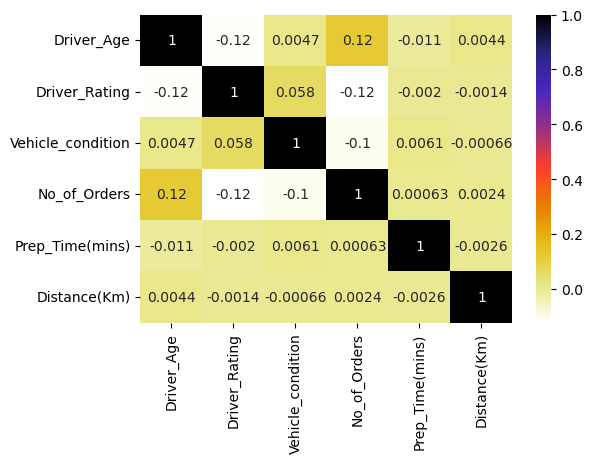

In [20]:
plt.figure(figsize=(6,4)) #increase heatmap size
sns.heatmap(cor, annot = True, cmap=plt.cm.CMRmap_r)
plt.savefig('Correlation Matrix', dpi =200, bbox_inches = 'tight')

**Comment** - Multic-colinearity does not exist among numerical features due to low correlation scores

#### iii. Feature Selection - Categorica Data (using Chi Square Test)

In [21]:
#categorical variables
cat_data = delivery.select_dtypes(exclude=[np.number])
cat_data.head()

,Weather,Traffic,Order_Type,Vehicle_Type,Holiday,City,Order_Day,Order_Month
0,Sunny,High,Snack,motorcycle,No,Urban,Saturday,March
1,Stormy,Jam,Snack,scooter,No,Metropolitian,Friday,March
2,Sandstorms,Low,Drinks,motorcycle,No,Urban,Saturday,March
3,Sunny,Medium,Buffet,motorcycle,No,Metropolitian,Wednesday,May
4,Cloudy,High,Snack,scooter,No,Metropolitian,Saturday,March


In [22]:
#checking distribution of values in each categorical feature
cat_distr= cat_data.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    cat_data[cat_distr]
    .melt(var_name='Category', value_name='Value')
    .value_counts())
.rename(columns={0: 'Count'})
.sort_values(by=['Category', 'Count']))

Count
Category     Value                   
City         Semi-Urban            84
             Urban               5212
             Metropolitian      17668
Holiday      Yes                  497
             No                 22467
Order_Day    Tuesday             2714
             Saturday            2784
             Sunday              3120
             Friday              3401
             Wednesday           3566
             Monday              3606
             Thursday            3773
Order_Month  August               477
             October              496
             July                 584
             September            593
             December             936
             April                938
             June                1007
             November            1104
             May                 1122
             January             1150
             February            3770
             March              10787
Order_Type   Buffet              5586
             Drinks              5747
             Snack               5770
             Meal                5861
Traffic      Jam                    1
             High                2239
             Medium              5674
             Jam                 7286
             Low                 7764
Vehicle_Type electric_scooter    1851
             scooter             7636
             motorcycle         13477
Weather      Sunny               3686
             Windy               3828
             Cloudy              3839
             Sandstorms          3842
             Fog                 3874
             Stormy              3895

In [23]:
#using label encoding for ordinal and binary categorical variables
ord_enc = OrdinalEncoder()
cat_data["Holiday"] = ord_enc.fit_transform(cat_data[["Holiday"]])
cat_data

,Weather,Traffic,Order_Type,Vehicle_Type,Holiday,City,Order_Day,Order_Month
0,Sunny,High,Snack,motorcycle,0.0,Urban,Saturday,March
1,Stormy,Jam,Snack,scooter,0.0,Metropolitian,Friday,March
2,Sandstorms,Low,Drinks,motorcycle,0.0,Urban,Saturday,March
3,Sunny,Medium,Buffet,motorcycle,0.0,Metropolitian,Wednesday,May
4,Cloudy,High,Snack,scooter,0.0,Metropolitian,Saturday,March
...,...,...,...,...,...,...,...,...
22959,Windy,Jam,Snack,motorcycle,1.0,Urban,Friday,March
22960,Windy,High,Meal,electric_scooter,0.0,Metropolitian,Sunday,February
22961,Cloudy,Jam,Meal,motorcycle,0.0,Metropolitian,Monday,January
22962,Sandstorms,Low,Buffet,motorcycle,0.0,Metropolitian,Tuesday,March


In [24]:
# one-hot encoding nominla categorical variables using get_dummies method
cat_data_encoded = pd.get_dummies(cat_data)
cat_data_encoded.head()

,Holiday,Weather_Cloudy,Weather_Fog,Weather_Sandstorms,Weather_Stormy,Weather_Sunny,Weather_Windy,Traffic_High,Traffic_Jam,Traffic_Jam,Traffic_Low,Traffic_Medium,Order_Type_Buffet,Order_Type_Drinks,Order_Type_Meal,Order_Type_Snack,Vehicle_Type_electric_scooter,Vehicle_Type_motorcycle,Vehicle_Type_scooter,City_Metropolitian,City_Semi-Urban,City_Urban,Order_Day_Friday,Order_Day_Monday,Order_Day_Saturday,Order_Day_Sunday,Order_Day_Thursday,Order_Day_Tuesday,Order_Day_Wednesday,Order_Month_April,Order_Month_August,Order_Month_December,Order_Month_February,Order_Month_January,Order_Month_July,Order_Month_June,Order_Month_March,Order_Month_May,Order_Month_November,Order_Month_October,Order_Month_September
0,0.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [25]:
#using chi-square test for categorical feature selection
X = cat_data_encoded
y = delivery['Time_taken(min)']

#splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Chi-square test returns 2 values the F-score and the p-value. The p-value is usually used in determining feature importance for categorical variables (especially Nominal).In the case of feature selection for machine learning, you would want the feature that is being compared to the target to have a low p-value (less than 0.05), as this means that the feature is dependent on (correlated to) the target.

In [26]:
#first array are f-scores while second array are the p-values
f_p_values = chi2(X_train, y_train)
f_p_values

(array([3728.89312465,  438.06332734,  444.20802853,  143.28887594,
         139.48585043,  921.97897226,  186.90379099,  294.99856153,
          27.79467085, 1652.04142995, 2025.84986565,  209.55045201,
          28.33508515,   37.23612514,   32.86216976,   33.91058971,
         131.27666895,  316.6145286 ,  364.59220943,  214.91568621,
        2572.73069755,  752.34606063,  261.55024916,   54.06844266,
          54.80366382,   31.74911767,  108.7487623 ,  140.62544953,
          48.57775458,  184.95561771,  119.47476733,  211.94357842,
          83.88877811,  177.51033101,   97.85032355,  173.91939506,
          31.84872541,  167.44727908,  144.30808794,  127.12989591,
         106.34381266]),
 array([0.00000000e+000, 2.29932549e-066, 1.42464122e-067, 1.91863882e-012,
        7.38178618e-012, 1.10708079e-164, 1.57480398e-019, 6.98655035e-039,
        9.73063437e-001, 0.00000000e+000, 0.00000000e+000, 2.04017127e-023,
        9.67825946e-001, 7.54776388e-001, 8.91163104e-001, 8.639559

In [27]:
#converting arrays in series for F_score and p-values
# Series for F_score
F_score = pd.Series(f_p_values[0])
F_score.index = X_train.columns

# Series for p-value
p_values = pd.Series(f_p_values[1])
p_values.index = X_train.columns

In [28]:
#converting 2 series to dataframe then merging them
df1 = pd.DataFrame(F_score)
df1 = df1.rename(columns = {0:'F_score'})

df2 = pd.DataFrame(p_values)
df2 = df2.rename(columns = {0:'p_values'})

chi_test_score = pd.concat([df1, df2 ], axis=1)
chi_test_score.head()

,F_score,p_values
Holiday,3728.893125,0.000000e+00
Weather_Cloudy,438.063327,2.299325e-66
Weather_Fog,444.208029,1.424641e-67
Weather_Sandstorms,143.288876,1.918639e-12
Weather_Stormy,139.485850,7.381786e-12


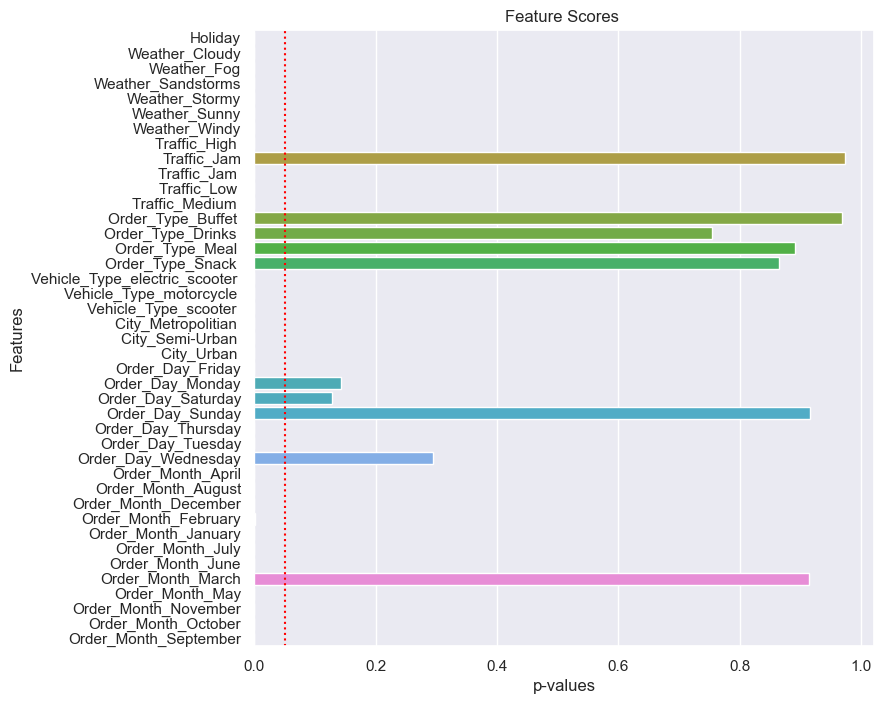

In [29]:
#Vizualizing p-scores of categorical features

#define figure size
sns.set(rc={"figure.figsize":(8, 8)}) #width= 8, height= 8

graph = sns.barplot(x = "p_values", y= X_train.columns, data = chi_test_score)

#Drawing a horizontal line at the p-value threshold 0.05 - vline (vertical line) while hline(horizontal line)
graph.axvline(0.05, color = 'red', ls = 'dotted')
sns.set(rc={"figure.figsize":(8, 8)}) #width= 8, height= 8

#set labels
plt.xlabel('p-values')
plt.ylabel('Features')
plt.title('Feature Scores ')

# Saving the plot:
plt.savefig('p-score graph.png', dpi = 200, bbox_inches = 'tight')

In [30]:
#drop columns with p > 0.05 from categorical df
cat_data2 = cat_data_encoded.drop(columns = ['Traffic_Jam','Order_Type_Buffet ', 'Order_Type_Drinks ', 'Order_Type_Meal ', 'Order_Type_Snack ',
                                             'Order_Day_Monday','Order_Day_Saturday','Order_Day_Sunday', 'Order_Day_Wednesday',
                                             'Order_Month_March'],axis = 1)
cat_data2.head()

,Holiday,Weather_Cloudy,Weather_Fog,Weather_Sandstorms,Weather_Stormy,Weather_Sunny,Weather_Windy,Traffic_High,Traffic_Jam,Traffic_Low,Traffic_Medium,Vehicle_Type_electric_scooter,Vehicle_Type_motorcycle,Vehicle_Type_scooter,City_Metropolitian,City_Semi-Urban,City_Urban,Order_Day_Friday,Order_Day_Thursday,Order_Day_Tuesday,Order_Month_April,Order_Month_August,Order_Month_December,Order_Month_February,Order_Month_January,Order_Month_July,Order_Month_June,Order_Month_May,Order_Month_November,Order_Month_October,Order_Month_September
0,0.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
#merge numerical and categorical features
#new catergorical df with features with p-value of < 0.05 is merged with nuerical df 
delivery2 = pd.concat([cat_data2, num_data], axis=1)
delivery2

,Holiday,Weather_Cloudy,Weather_Fog,Weather_Sandstorms,Weather_Stormy,Weather_Sunny,Weather_Windy,Traffic_High,Traffic_Jam,Traffic_Low,Traffic_Medium,Vehicle_Type_electric_scooter,Vehicle_Type_motorcycle,Vehicle_Type_scooter,City_Metropolitian,City_Semi-Urban,City_Urban,Order_Day_Friday,Order_Day_Thursday,Order_Day_Tuesday,Order_Month_April,Order_Month_August,Order_Month_December,Order_Month_February,Order_Month_January,Order_Month_July,Order_Month_June,Order_Month_May,Order_Month_November,Order_Month_October,Order_Month_September,Driver_Age,Driver_Rating,Vehicle_condition,No_of_Orders,Time_taken(min),Prep_Time(mins),Distance(Km)
0,0.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,4.9,2,1,24,15,3.025149
1,0.0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,34,4.5,2,2,33,5,20.183530
2,0.0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,4.4,0,2,26,15,1.552758
3,0.0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,38,4.7,0,2,21,10,7.790401
4,0.0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,4.6,1,2,30,15,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22959,1.0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,30,4.6,0,3,52,5,13.407093
22960,0.0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28,4.8,2,1,16,5,6.290135
22961,0.0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,36,4.6,0,1,34,15,7.761839
22962,0.0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,23,5.0,0,2,19,15,10.586911


### 5. Feature Importance

Not all features are created equally, some have more predicitive effect on the target variable more than others. The random forest regressor helps in sorting features based on their ability to predict the the target.

In [32]:
#splitting the features and target 
X = delivery2.drop(columns = 'Time_taken(min)', axis = 1)
y = delivery2[['Time_taken(min)']]

#train test split of independent and target df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#creating a random forest regressor
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

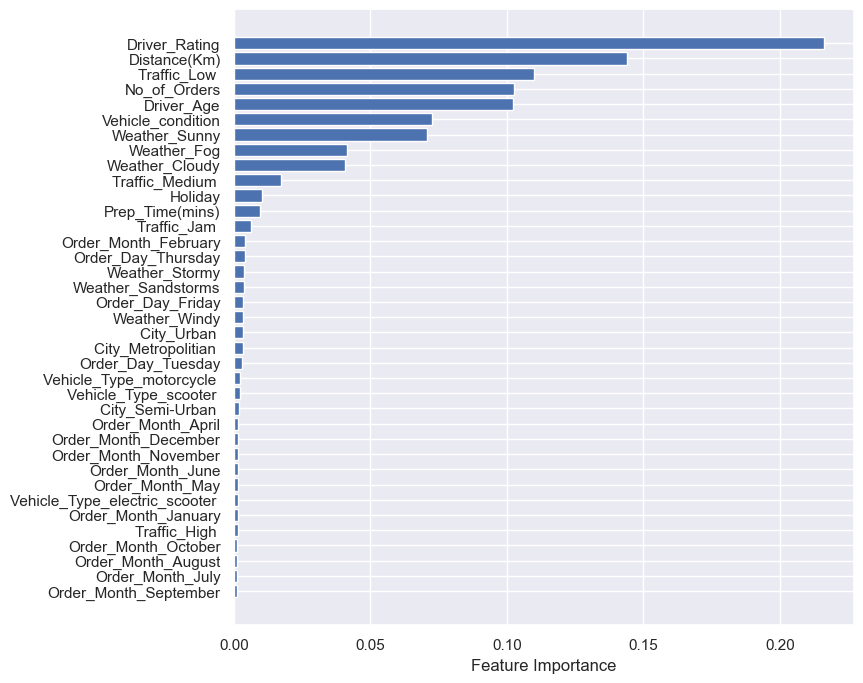

In [34]:
#feature importance plot
sort = rf.feature_importances_.argsort()
plt.barh(X.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.savefig('Feature Importance.png', dpi = 200, bbox_inches = 'tight')

Top 10 Factors affecting delivery time are; 

1. Driver Rating
2. Distance (Km)
3. Traffic Level
4. Driver Age
5. Number of Orders
6. Vehicle Condition
7. Weather Conditions
8. Holiday
9. Preparation Time
10. City

Not much of surprising list as these are all factors expected the have an impact on delivery time. An interesting observation is that Order Time in terms of days and months, and also vehicle type do not rank high in determing the target variable. I expected these factors to rank high intuitively, but this is why we have data to make well informed decision.
By focusing on the key drivers, management can implement strategies to improve delivery speed which will inturn increase sales via repeat orders from customers

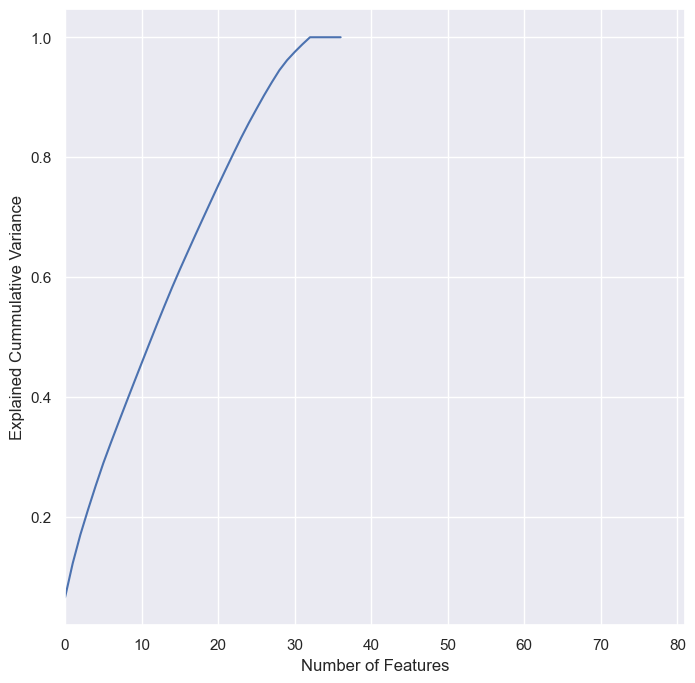

In [36]:
#Using PCA to determine optimal feature number to be used for the model
from sklearn.preprocessing import StandardScaler
X_train = np.asarray(X_train)

#Standardizing X-train
X_std = StandardScaler().fit_transform(X_train)
pca = PCA().fit(X_std)

#plotting PCA graph to view explained_variance_ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,81,1)
plt.xlabel('Number of Features')
plt.ylabel('Explained Cummulative Variance')
plt.show()

**Observation** - The first 30 features explains close to 100% of the variance in the dataset

### 6. ML Modelling - Intepretation and Evaluation

Before applying machine learning models to the dataset, the features (X) dataset will be scaled using the MinMaxScaler() from scikit learn. Scaling is pre-processing technique brings data points that are far from each other closer in order to increase the algorithm effectiveness and speed up the Machine Learning processing. Scaling data enables the model to learn and actually understand the problem.

After scaling, 6 models will be tested and the one with the best metric scores (highest R2 and lowest RMSE) will be used for evaluation

#### i. Spliting and Scaling Datasets

In [37]:
#Split dataset into train and test dataset in 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

print(X.shape, X_train.shape, X_test.shape) #training data 80% (18371) and test data 20% (4593)

(22964, 37) (18371, 37) (4593, 37)


In [38]:
# import module
from sklearn.preprocessing import MinMaxScaler

# scale features
minscaler = MinMaxScaler()
X_train = minscaler.fit_transform(X_train)
X_test = minscaler.transform(X_test)
 
# print scaled features
print(X_train)
print(X_test)

[[0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 3.33333333e-01
  1.00000000e+00 1.08542007e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.33333333e-01
  0.00000000e+00 2.72961901e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.33333333e-01
  1.00000000e+00 9.20781505e-04]
 ...
 [1.00000000e+00 1.00000000e+00 0.00000000e+00 ... 3.33333333e-01
  1.00000000e+00 1.84327351e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.33333333e-01
  0.00000000e+00 9.14906202e-04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 6.66666667e-01
  1.00000000e+00 1.37158454e-03]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.33333333e-01
  0.00000000e+00 2.21641095e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 6.70630282e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.05745657e-06]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.00000000e-01 1.56734733e-03]

#### ii. Computing scores for the different ML models

In [42]:
#Linear Regression - Fitting, Predicing, Accuracy Scores
import sklearn.metrics as metrics

linreg = LinearRegression() #call the model
linreg.fit(X_train,y_train) #fit the model
y_pred_linreg = linreg.predict(X_test) #use model for prediction
linreg_score = round(metrics.r2_score(y_test, y_pred_linreg) * 100, 2) #calculate R2
linreg_rmse = mean_squared_error(y_test, y_pred_linreg) #calculate RMSE


#Ridge Regression - Fitting, Predicing, Accuracy Scores
ridgereg = Ridge()
ridgereg.fit(X_train,y_train)
y_pred_ridgereg = ridgereg.predict(X_test)
ridgereg_score = round(metrics.r2_score(y_test, y_pred_ridgereg) * 100, 2)
ridgereg_rmse = mean_squared_error(y_test, y_pred_ridgereg)

#Lasso Regression - Fitting, Predicing, Accuracy Scores
lassoreg = Lasso()
lassoreg.fit(X_train, y_train)
y_pred_lassoreg = lassoreg.predict(X_test)
lassoreg_score = round(metrics.r2_score(y_test, y_pred_lassoreg) * 100, 2)
lassoreg_rmse = mean_squared_error(y_test, y_pred_lassoreg)

#XGBRegressor - Fitting, Predicing, Accuracy Scores
XGBR = xg.XGBRegressor()
XGBR.fit(X_train, y_train)
y_pred_XGBR = XGBR.predict(X_test)
XGBR_score = round(metrics.r2_score(y_test, y_pred_XGBR) * 100, 2)
XGBR_rmse = mean_squared_error(y_test, y_pred_XGBR)

#HistGradientBoostingRegressor - Fitting, Predicing, Accuracy Scores
HGBR = HistGradientBoostingRegressor()
HGBR.fit(X_train, y_train)
y_pred_HGBR = HGBR.predict(X_test)
HGBR_score = round(metrics.r2_score(y_test, y_pred_HGBR) * 100, 2)
HGBR_rmse = mean_squared_error(y_test, y_pred_HGBR)

#Random Forest - Fitting, Predicing, Accuracy Scores
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_score = round(metrics.r2_score(y_test, y_pred_rf) * 100, 2)
rf_rmse = mean_squared_error(y_test, y_pred_rf)

In [43]:
# Creating dataframe to display results of all models
Model_Comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression','XGBR', 
              'HGBR', 'Random Forest'],
    'R2_Score': [linreg_score, ridgereg_score, lassoreg_score,XGBR_score, 
              HGBR_score, rf_score],
    'RMSE': [linreg_rmse, ridgereg_rmse, lassoreg_rmse,XGBR_rmse, 
              HGBR_rmse, rf_rmse]})  

#sort dafaframe based on R2_Score Value
Model_Comparison = Model_Comparison.sort_values(by='R2_Score', ascending=False)
Model_Comparison

,Model,R2_Score,RMSE
4,HGBR,83.19,14.674305
5,Random Forest,82.36,15.399482
3,XGBR,82.09,15.640497
0,Linear Regression,59.52,35.346534
1,Ridge Regression,59.52,35.347801
2,Lasso Regression,11.34,77.409305


#### iii. Intepretation of Results

The 2 metrics often used to evaluate regression models are R2 (R squared) and Root Mean Square Error (RMSE).

R2 also known as **coefficient of determination** defines the degree to which the variance in the dependent variable (target) can be explained by the independent variable (features). R2 indicates the proportion of data points which lie within the line created by the regression equation. A higher value of R2 is desirable as it indicates better results.

Using the model with the R2 (HistGradientBoostingRegressor), it can be inferred that 83.09% of the changeability of the dependent output attribute can be explained by the model while the remaining 16.91% of the variability is still unaccounted for.

Another way to assess a regression model is a dataset is to calculate the **Root Mean Square Error (RMSE)**  which is a metric that tells us the average distance between the predicted values from the model and the actual values in the dataset. The lower the RMSE, the better a given model is able to “fit” a dataset. Model with the lowest RMSE is also the HistGradientBoostingRegressor with a score of 14.78

#### iv. Model Evaluation

In [44]:
# create regressor object
regressor = HistGradientBoostingRegressor().fit(X, y)
regressor.score(X,y)  

# fit the regressor with x and y data
regressor.fit(X, y)

HistGradientBoostingRegressor()

In [45]:
#Selecting rows from the test dataset X_test for evaluation
X_test

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.33333333e-01, 0.00000000e+00, 2.21641095e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 6.70630282e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.05745657e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.00000000e-01, 1.56734733e-03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 2.26624179e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.33333333e-01, 5.00000000e-01, 1.34524648e-03]])

In [46]:
#Evaluating predictive capacity of the model using pre-scaled DF
data = delivery2.iloc[[18049]]

#Spliting data into features set and target set
X_data = data.drop(columns = 'Time_taken(min)', axis = 1)
y_data = data['Time_taken(min)']

print(X_data)
print(y_data)

       Holiday  Weather_Cloudy  Weather_Fog  Weather_Sandstorms  \
18049      0.0               0            0                   0   

       Weather_Stormy  Weather_Sunny  Weather_Windy  Traffic_High   \
18049               0              1              0              0   

       Traffic_Jam   Traffic_Low   Traffic_Medium   \
18049             1             0                0   

       Vehicle_Type_electric_scooter   Vehicle_Type_motorcycle   \
18049                               0                         1   

       Vehicle_Type_scooter   City_Metropolitian   City_Semi-Urban   \
18049                      0                    1                 0   

       City_Urban   Order_Day_Friday  Order_Day_Thursday  Order_Day_Tuesday  \
18049            0                 1                   0                  0   

       Order_Month_April  Order_Month_August  Order_Month_December  \
18049                  0                   0                     0   

       Order_Month_February  Order_Mo

In [47]:
# changing input_data to a numpy array
X_data_numpy_array = np.asarray(X_data)
y_data_numpy_array = np.asarray(y_data)


# reshape the array
X_data_reshaped = X_data_numpy_array.reshape(1,-1)
y_data_reshaped = y_data_numpy_array.reshape(1,-1)

prediction = regressor.predict(X_data_reshaped)
actual_time = y_data_reshaped

print('Actual Delivery mins =', actual_time[0])
print('Predicted1 Delivery mins =', round(prediction[0],2))

Actual Delivery mins = [25]
Predicted1 Delivery mins = 24.18


In [48]:
#creating a dataframe for predicted scores using the random forest model
y_pred = HGBR.predict(X_test)

#convert array to dataframe
y_pred = pd.DataFrame(y_pred, columns = ['Predicted Time_taken(min)'])
y_pred.head()

,Predicted Time_taken(min)
0,23.027501
1,28.334213
2,14.738247
3,23.584569
4,19.585597


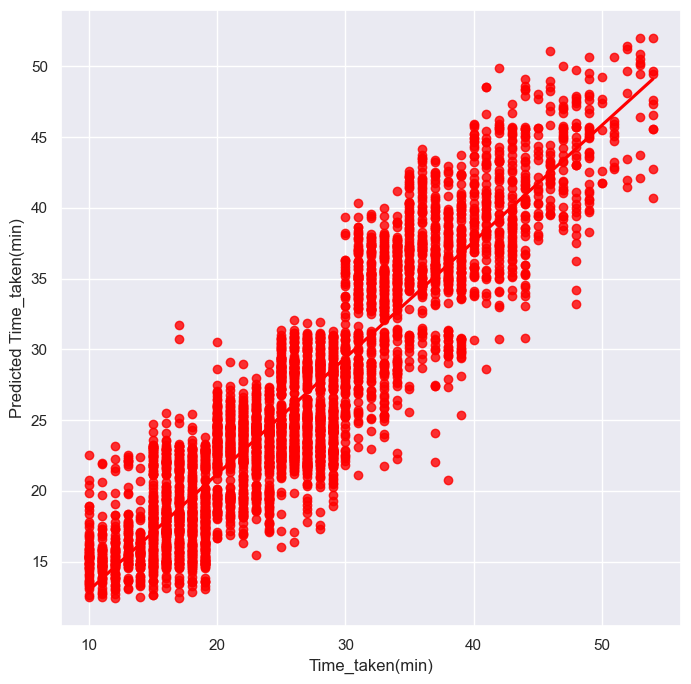

In [50]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.savefig('Regression Plot', dpi = 200, bbox_inches = 'tight')

### Conclusion

The project set out to food delivery time using dataset provided by a 3rd party delivery site. Along the way, the features were engineered to improve their predictive capability. Data was cleaned and vizualized before performing necessary feature selection techniques and also identifying the mosti important features using random forest.

After getting the appropriate features, 6 algorithim were tried applied with the best one selected. Lastly,the model was evaluated and the next tpyes from here should be hyper paramter tunning to better imporve the forecasting capabilies of the ML models